# Лабораторная работа №2 (Pandas)

Выполнил студент группы М8О-103М-20 Ларин Антон

Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Получить от объекта Series показатели описательной статистики

In [6]:
s = pd.Series(np.arange(10))
s.describe()

count    10.00000
mean      4.50000
std       3.02765
min       0.00000
25%       2.25000
50%       4.50000
75%       6.75000
max       9.00000
dtype: float64

Узнать частоту уникальных элементов объекта Series (гистограмма)

<BarContainer object of 8 artists>

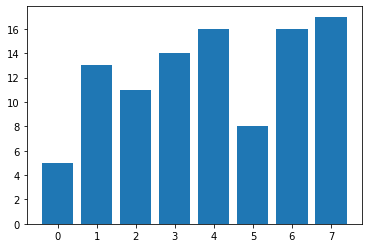

In [7]:
s = pd.Series(np.random.randint(0, 8, 100))
frequency = s.value_counts()
plt.bar(frequency.index, frequency.values)

Заменить все элементы объекта Series на "Other", кроме двух наиболее часто встречающихся

In [9]:
oldS = pd.Series(np.random.randint(0, 5, 20), name = "Old")
print(oldS.value_counts())
newS = oldS.copy()
newS.name = "New"
newS[~newS.isin(newS.value_counts().index[:2])] = "Other"
pd.concat([oldS, newS], axis = 1)

3    7
4    6
2    3
1    3
0    1
Name: Old, dtype: int64


,Old,New
0,4,4
1,3,3
2,3,3
3,3,3
4,3,3
5,1,Other
6,3,3
7,2,Other
8,3,3
9,4,4


Создать объект Series в индексах дата каждый день 2019 года, в значениях случайное значение

In [10]:
dates = pd.date_range(start = '2019-01-01', end = '2019-12-31')
datesSeries = pd.Series(np.random.rand(len(dates)), index = dates)
datesSeries

2019-01-01    0.701474
2019-01-02    0.195583
2019-01-03    0.949616
2019-01-04    0.265569
2019-01-05    0.217038
                ...   
2019-12-27    0.898389
2019-12-28    0.804122
2019-12-29    0.007880
2019-12-30    0.283302
2019-12-31    0.119649
Freq: D, Length: 365, dtype: float64

Найти сумму всех вторников

In [11]:
tuesdaySum = np.sum(datesSeries[datesSeries.index.weekday == 2])
tuesdaySum

25.604059182273545

Для каждого месяца найти среднее значение

In [12]:
monthAvg = datesSeries.resample('M').mean()
monthAvg

2019-01-31    0.434244
2019-02-28    0.588465
2019-03-31    0.568060
2019-04-30    0.561589
2019-05-31    0.500916
2019-06-30    0.421698
2019-07-31    0.546132
2019-08-31    0.503595
2019-09-30    0.461916
2019-10-31    0.562441
2019-11-30    0.520665
2019-12-31    0.475826
Freq: M, dtype: float64

Преобразовать объект Series в DataFrame заданной формы (shape)

In [13]:
m = 4
n = 5
s = pd.Series(np.arange(m * n))    
df = pd.DataFrame(s.values.reshape(m, n))
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


Найти индексы объекта Series кратные 3

In [27]:
s = pd.Series(np.arange(10) * 10)
s[s % 3 == 0]

0     0
3    30
6    60
9    90
dtype: int32

Получить данные по индексам объекта Series

In [15]:
s = pd.Series(np.arange(10))
indexes = [0, 2, 4, 5, 8]
s[indexes]

0    0
2    2
4    4
5    5
8    8
dtype: int32

Объединить два объекта Series вертикально и горизонтально

In [16]:
s1 = pd.Series(np.arange(5))
s2 = pd.Series(np.arange(5) + 10)
resVertical = pd.concat([s1, s2])
resHorizontal = pd.concat([s1, s2], axis=1)
print(resVertical)
print(resHorizontal)

0     0
1     1
2     2
3     3
4     4
0    10
1    11
2    12
3    13
4    14
dtype: int32
   0   1
0  0  10
1  1  11
2  2  12
3  3  13
4  4  14


Получить индексы объекта Series A, данные которых содержатся в объетке Series B

In [39]:
a = pd.Series(np.random.randint(0, 10, 10));
b = pd.Series(np.random.randint(0, 10, 5));
print(a)
print(b)
print(a[a.isin(b)].index)

0    1
1    2
2    5
3    0
4    4
5    2
6    7
7    1
8    8
9    0
dtype: int32
0    6
1    1
2    9
3    7
4    4
dtype: int32
Int64Index([0, 4, 6, 7], dtype='int64')


Получить объект Series B, который содержит элементы без повторений объекта A

In [42]:
b = a.unique()
b

array([1, 2, 5, 0, 4, 7, 8])

Преобразовать каждый символ объекта Series в верхний регистр

In [18]:
strSeries = pd.Series(["abcd", "efg", "hi"])
strSeries = strSeries.map(lambda x: x.upper())
strSeries

0    ABCD
1     EFG
2      HI
dtype: object

Преобразовать данные Series в строку

In [19]:
s = pd.Series(np.arange(5))
s = s.map(lambda x: str(x))
catString = s.str.cat(sep=" ")
print(catString, type(catString))

0 1 2 3 4 <class 'str'>


Рассчитать количество символов в объекте Series

In [20]:
print(strSeries)
lenSeries = strSeries.map(lambda x: len(x))
print(lenSeries)
print(np.sum(lenSeries))

0    ABCD
1     EFG
2      HI
dtype: object
0    4
1    3
2    2
dtype: int64
9


Преобразовать в строковый тип

In [21]:
s = pd.Series(np.arange(5))
s = s.map(lambda x: str(x))
print(s, type(s[0]))

0    0
1    1
2    2
3    3
4    4
dtype: object <class 'str'>


Найти разность между объектом Series и смещением объекта Series на n

In [45]:
n = 3
s = pd.Series(np.arange(8))
diff = s.diff(periods = n)
diff

0    NaN
1    NaN
2    NaN
3    3.0
4    3.0
5    3.0
6    3.0
7    3.0
dtype: float64

Преобразовать разные форматы строк объекта Series в дату

In [47]:
s = pd.Series(['2020-11-16', '16 Nov 2020', '2020/11/16'])
dates = pd.to_datetime(s)
dates

0   2020-11-16
1   2020-11-16
2   2020-11-16
dtype: datetime64[ns]

Все данные должны иметь одинаковый формат (часто бывает выгрузка из SQL)

Преобразовать в дату

In [48]:
s = pd.Series(['2020-11-16', '2020-11-17', '2020-12-31', '2021-01-01'])
dates = pd.to_datetime(s, format="%Y.%m.%d")
dates

0   2020-11-16
1   2020-11-17
2   2020-12-31
3   2021-01-01
dtype: datetime64[ns]

Получить год, месяц, день, день недели, номер дня в году от объекта Series (string)

Получить года

In [60]:
years = dates.dt.year
years

0    2020
1    2020
2    2020
3    2021
dtype: int64

Получить месяца

In [133]:
months = dates.dt.month
months

0    11
1    11
2    12
3     1
dtype: int64

Получить дни

In [63]:
days = dates.dt.day
days

0    16
1    17
2    31
3     1
dtype: int64

Получить номер недели

In [64]:
weekNumbers = dates.dt.weekofyear
weekNumbers

0    47
1    47
2    53
3    53
dtype: int64

Получить номер дня в году

In [65]:
dayNumbers = dates.dt.dayofyear
dayNumbers

0    321
1    322
2    366
3      1
dtype: int64

Отобрать элементы объекта Series, которые содержат не менее двух гласных

In [3]:
import re

words = pd.Series(['Программист', 'решал', 'проблему', 'регэкспами.', 'Теперь', 'у', 'него', 'их', 'две'])
words[words.map(lambda word: bool(re.match('([^aeiouyаоиеёэыуюя]*[aeiouyаоиеёэыуюя]){2,}', word, re.I)))]

0    Программист
1          решал
2       проблему
3    регэкспами.
4         Теперь
6           него
dtype: object

Отобрать e-маилы из объекта Series (можно юзать регулярки)

In [4]:
emails = pd.Series(['123456@i.ru', '_login@ru.name.com', 'login.3@i.c', 'login@.ru', 'login@com', 'log/in/@i.com'])

emails[emails.map(lambda email: bool(re.match('[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}', email)))]

0           123456@i.ru
1    _login@ru.name.com
dtype: object

Получить среднее значение каждого уникального объекта Series s1 через "маску" другого объекта Series s2

In [5]:
s1 = pd.Series(np.random.randint(1, 6, 10), name = "Values")
s2 = pd.Series(np.random.choice(['A', 'B', 'C', 'D'], 10), name = "Mask")
print(pd.concat([s1, s2], axis = 1))
s1.groupby(s2).mean()

   Values Mask
0       5    D
1       1    A
2       3    A
3       3    C
4       3    A
5       5    A
6       5    C
7       2    B
8       3    B
9       4    B


Mask
A    3
B    3
C    4
D    5
Name: Values, dtype: int32